In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
from platform import python_version
 
 
print("Current Python Version-", python_version())

Current Python Version- 3.8.6


In [3]:
import numpy
numpy.version.version

'1.23.5'

In [4]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,
2020-04-30 19:00:00,242.060716,18.870796,71.072939,188.915151,91.471325,4.0,3.0,30.0,19.0
2020-04-30 20:00:00,218.655079,18.056864,75.132153,178.704750,84.176485,4.0,3.0,30.0,20.0
2020-04-30 21:00:00,194.147868,17.090891,81.315038,161.421792,73.858294,4.0,3.0,30.0,21.0
2020-04-30 22:00:00,206.432889,16.714085,82.568155,197.744043,83.279611,4.0,3.0,30.0,22.0
2020-04-30 23:00:00,173.577429,16.365121,83.662401,162.157636,68.669099,4.0,3.0,30.0,23.0


In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [6]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [7]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_NO2
Date,,,,,,,,,,
2019-10-02 11:00:00,621.625704,26.378438,58.063437,46.094860,3.605625,10.0,2.0,2.0,11.0,15.230400
2019-10-02 12:00:00,725.154408,25.795055,48.256857,57.532808,13.865109,10.0,2.0,2.0,12.0,5.384051
2019-10-07 10:00:00,108.196313,32.344264,37.260757,47.259008,11.447809,10.0,0.0,7.0,10.0,4.255772
2019-10-07 11:00:00,135.822676,34.926112,35.013036,42.114260,10.075221,10.0,0.0,7.0,11.0,16.268034
2019-10-07 12:00:00,203.757758,36.201221,31.829282,45.701366,7.624153,10.0,0.0,7.0,12.0,12.770444


# CO DATA

In [8]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from flaml import AutoML
from sklearn.datasets import fetch_california_housing
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'

#train_test_split(X, y, test_size = 0.2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [9]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

In [10]:
df1=[x for _, x in NO2_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]
#data_mar=data_mar.sample(frac=1)
data_apr=df1[3]
#data_apr=data_apr.sample(frac=1)
data=[data_oct,data_nov,data_dec,data_jan,data_feb,data_mar]

In [11]:
data_Oct=data_oct.resample('60min').mean()
data_Oct=data_Oct.dropna()
data_Nov=data_nov.resample('60min').mean()
data_Nov=data_Nov.dropna()
data_Dec=data_dec.resample('60min').mean()
data_Dec=data_Dec.dropna()
data_Jan=data_jan.resample('60min').mean()
data_Jan=data_Jan.dropna()
data_Feb=data_feb.resample('60min').mean()
data_Feb=data_Feb.dropna()
data_Mar=data_mar.resample('60min').mean()
data_Mar=data_Mar.dropna()
data_Apr=data_apr.resample('60min').mean()
data_Apr=data_Apr.dropna()

In [12]:
co_data=NO2_Data
co_data=co_data.resample('60min').mean()
co_data=co_data.dropna()
X=co_data[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]
y=co_data['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings,estimator_list=["xgboost"])#,estimator_list=["xgboost"]
pred=automl.predict(X_test)
rmse_r=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)

[flaml.automl: 12-19 16:08:11] {2599} INFO - task = regression
[flaml.automl: 12-19 16:08:11] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:08:11] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:08:11] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:08:11] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:08:11] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:11] {3296} INFO - Estimated sufficient time budget=1056s. Estimated n

[flaml.automl: 12-19 16:08:13] {3343} INFO -  at 2.5s,	estimator xgboost's best error=3.6251,	best estimator xgboost's best error=3.6251
[flaml.automl: 12-19 16:08:13] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:13] {3343} INFO -  at 2.8s,	estimator xgboost's best error=3.4277,	best estimator xgboost's best error=3.4277
[flaml.automl: 12-19 16:08:13] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:19] {3343} INFO -  at 8.2s,	estimator xgboost's best error=3.0701,	best estimator xgboost's best error=3.0701
[flaml.automl: 12-19 16:08:19] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `s

[flaml.automl: 12-19 16:08:36] {3343} INFO -  at 25.6s,	estimator xgboost's best error=2.8830,	best estimator xgboost's best error=2.8830
[flaml.automl: 12-19 16:08:36] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:39] {3343} INFO -  at 28.4s,	estimator xgboost's best error=2.8830,	best estimator xgboost's best error=2.8830
[flaml.automl: 12-19 16:08:39] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:51] {3343} INFO -  at 40.1s,	estimator xgboost's best error=2.8467,	best estimator xgboost's best error=2.8467
[flaml.automl: 12-19 16:08:51] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:09:02] {3343} INFO -  at 51.6s,	estimator xgboost's best error=2.8467,	best estimator xgboost's best error=2.8467
[flaml.automl: 12-19 16:09:02] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:03] {3343} INFO -  at 52.3s,	estimator xgboost's best error=2.8467,	best estimator xgboost's best error=2.8467
[flaml.automl: 12-19 16:09:03] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:15] {3343} INFO -  at 64.7s,	estimator xgboost's best error=2.8467,	best estimator xgboost's best error=2.8467
[flaml.automl: 12-19 16:09:15] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:09:25] {3343} INFO -  at 74.5s,	estimator xgboost's best error=2.8467,	best estimator xgboost's best error=2.8467
[flaml.automl: 12-19 16:09:25] {3166} INFO - iteration 87, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:26] {3343} INFO -  at 75.7s,	estimator xgboost's best error=2.8467,	best estimator xgboost's best error=2.8467
[flaml.automl: 12-19 16:09:26] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:36] {3343} INFO -  at 85.8s,	estimator xgboost's best error=2.8467,	best estimator xgboost's best error=2.8467
[flaml.automl: 12-19 16:09:36] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:09:46] {3343} INFO -  at 95.1s,	estimator xgboost's best error=2.8467,	best estimator xgboost's best error=2.8467
[flaml.automl: 12-19 16:09:46] {3166} INFO - iteration 112, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:48] {3343} INFO -  at 97.5s,	estimator xgboost's best error=2.8467,	best estimator xgboost's best error=2.8467
[flaml.automl: 12-19 16:09:48] {3166} INFO - iteration 113, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:00] {3343} INFO -  at 109.0s,	estimator xgboost's best error=2.8467,	best estimator xgboost's best error=2.8467
[flaml.automl: 12-19 16:10:00] {3166} INFO - iteration 125, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:10:13] {3343} INFO -  at 122.2s,	estimator xgboost's best error=2.8467,	best estimator xgboost's best error=2.8467
[flaml.automl: 12-19 16:10:13] {3166} INFO - iteration 137, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:13] {3343} INFO -  at 122.7s,	estimator xgboost's best error=2.8467,	best estimator xgboost's best error=2.8467
[flaml.automl: 12-19 16:10:13] {3166} INFO - iteration 138, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:39] {3343} INFO -  at 147.9s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:10:39] {3166} INFO - iteration 150, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:11:01] {3343} INFO -  at 170.1s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:11:01] {3166} INFO - iteration 162, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:02] {3343} INFO -  at 171.4s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:11:02] {3166} INFO - iteration 163, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:24] {3343} INFO -  at 193.5s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:11:24] {3166} INFO - iteration 175, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:11:55] {3343} INFO -  at 224.3s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:11:55] {3166} INFO - iteration 187, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:56] {3343} INFO -  at 225.2s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:11:56] {3166} INFO - iteration 188, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:22] {3343} INFO -  at 251.1s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:12:22] {3166} INFO - iteration 200, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:12:48] {3343} INFO -  at 277.6s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:12:48] {3166} INFO - iteration 212, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:50] {3343} INFO -  at 279.3s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:12:50] {3166} INFO - iteration 213, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:12] {3343} INFO -  at 301.3s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:13:12] {3166} INFO - iteration 225, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:13:34] {3343} INFO -  at 323.2s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:13:34] {3166} INFO - iteration 237, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:34] {3343} INFO -  at 323.6s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:13:34] {3166} INFO - iteration 238, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:02] {3343} INFO -  at 351.4s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:14:02] {3166} INFO - iteration 250, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:14:24] {3343} INFO -  at 372.9s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:14:24] {3166} INFO - iteration 262, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:26] {3343} INFO -  at 375.1s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:14:26] {3166} INFO - iteration 263, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:48] {3343} INFO -  at 397.0s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:14:48] {3166} INFO - iteration 275, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:15:06] {3343} INFO -  at 415.3s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:15:06] {3166} INFO - iteration 287, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:11] {3343} INFO -  at 420.1s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:15:11] {3166} INFO - iteration 288, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:45] {3343} INFO -  at 454.1s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:15:45] {3166} INFO - iteration 300, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:16:08] {3343} INFO -  at 477.7s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:16:08] {3166} INFO - iteration 312, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:09] {3343} INFO -  at 478.5s,	estimator xgboost's best error=2.8073,	best estimator xgboost's best error=2.8073
[flaml.automl: 12-19 16:16:09] {3166} INFO - iteration 313, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

[flaml.automl: 12-19 16:16:31] {3609} INFO - retrained model: XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.7979726128010747, colsample_bynode=1,
             colsample_bytree=0.8876846602636955, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.09917455452279196,
             max_delta_step=0, max_depth=0, max_leaves=66,
             min_child_weight=2.624101849649499, missing=nan,
             monotone_constraints='()', n_estimators=117, n_jobs=-1,
             num_parallel_tree=1, random_state=0,
             reg_alpha=0.0026653271268746895, reg_lambda=0.034924483434856476,
             scale_pos_weight=1, subsample=0.7910894322151373,
             tree_method='hist', use_label_encoder=False, validate_parameters=1,
             verbosity=0)
[flaml.automl: 12-19 16:16:31] {2901} INFO - fit succeeded
[flaml.automl: 12-19 16:16:31] {2902} INFO - Time taken to find 

In [13]:
from sklearn.neighbors import LocalOutlierFactor
A=['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_O3']
B='Ref'
frame1=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Mar]#,data_feb
Train1=pd.concat(frame1)
train1=Train1.sample(frac=1)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(train1)
mask = yhat != -1
train1= train1[mask]
test1=data_Apr
yhat = lof.fit_predict(test1)
mask = yhat != -1
test1= test1[mask]

frame2=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Apr]#,data_feb
Train2=pd.concat(frame2)
train2=Train2.sample(frac=1)
yhat = lof.fit_predict(train2)
mask = yhat != -1
train2= train2[mask]
test2=data_Mar
yhat = lof.fit_predict(test2)
mask = yhat != -1
test2= test2[mask]

frame3=[data_Oct,data_Nov,data_Dec,data_Jan,data_Mar,data_Apr]#,data_feb
Train3=pd.concat(frame3)
train3=Train3.sample(frac=1)
yhat = lof.fit_predict(train3)
mask = yhat != -1
train3= train3[mask]
test3=data_Feb
yhat = lof.fit_predict(test3)
mask = yhat != -1
test3= test3[mask]

frame4=[data_Oct,data_Nov,data_Dec,data_Feb,data_Mar,data_Apr]#,data_feb
Train4=pd.concat(frame4)
train4=Train4.sample(frac=1)
yhat = lof.fit_predict(train4)
mask = yhat != -1
train4= train4[mask]
test4=data_Jan
yhat = lof.fit_predict(test4)
mask = yhat != -1
test4= test4[mask]

frame5=[data_Oct,data_Nov,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train5=pd.concat(frame5)
train5=Train5.sample(frac=1)
yhat = lof.fit_predict(train5)
mask = yhat != -1
train5= train5[mask]
test5=data_Dec
yhat = lof.fit_predict(test5)
mask = yhat != -1
test5= test5[mask]

frame6=[data_Oct,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train6=pd.concat(frame6)
train6=Train6.sample(frac=1)
yhat = lof.fit_predict(train6)
mask = yhat != -1
train6= train6[mask]
test6=data_Nov
yhat = lof.fit_predict(test6)
mask = yhat != -1
test6= test6[mask]

frame7=[data_Nov,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train7=pd.concat(frame7)
train7=Train7.sample(frac=1)
yhat = lof.fit_predict(train7)
mask = yhat != -1
train7= train7[mask]
test7=data_Oct
yhat = lof.fit_predict(test7)
mask = yhat != -1
test7= test7[mask]


Train=[train1,train2,train3,train4,train5,train6,train7]
Test=[test1,test2,test3,test4,test5,test6,test7]

In [14]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

rmse=[]

# Train with labeled input data
for i in range(7):
    automl.fit(X_train=Train[i][A], y_train=Train[i][B],
           **automl_settings,estimator_list=["xgboost"])#,estimator_list=["xgboost"]
    pred=automl.predict(Test[i][A])
    R2=round(sm.r2_score(Test[i][B], pred), 2)
    r=round(np.corrcoef(Test[i][B], pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(Test[i][B], pred))/np.mean(Test[i][B]),2)
    rmse.append(RMSE)
    print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
#print(automl.model.estimator)

[flaml.automl: 12-19 16:16:36] {2599} INFO - task = regression
[flaml.automl: 12-19 16:16:36] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:16:36] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:16:36] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:16:36] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:16:36] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:36] {3296} INFO - Estimated sufficient time budget=2937s. Estimated n

[flaml.automl: 12-19 16:16:38] {3343} INFO -  at 2.2s,	estimator xgboost's best error=3.9776,	best estimator xgboost's best error=3.9776
[flaml.automl: 12-19 16:16:38] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:38] {3343} INFO -  at 2.4s,	estimator xgboost's best error=3.9417,	best estimator xgboost's best error=3.9417
[flaml.automl: 12-19 16:16:38] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:46] {3343} INFO -  at 10.3s,	estimator xgboost's best error=3.3351,	best estimator xgboost's best error=3.3351
[flaml.automl: 12-19 16:16:46] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:17:52] {3343} INFO -  at 76.3s,	estimator xgboost's best error=3.1849,	best estimator xgboost's best error=3.1849
[flaml.automl: 12-19 16:17:52] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:18:07] {3343} INFO -  at 90.9s,	estimator xgboost's best error=3.1849,	best estimator xgboost's best error=3.1849
[flaml.automl: 12-19 16:18:07] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:19:08] {3343} INFO -  at 152.1s,	estimator xgboost's best error=3.1849,	best estimator xgboost's best error=3.1849
[flaml.automl: 12-19 16:19:08] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:20:14] {3343} INFO -  at 217.7s,	estimator xgboost's best error=3.1849,	best estimator xgboost's best error=3.1849
[flaml.automl: 12-19 16:20:14] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:20:19] {3343} INFO -  at 222.9s,	estimator xgboost's best error=3.1849,	best estimator xgboost's best error=3.1849
[flaml.automl: 12-19 16:20:19] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:21:27] {3343} INFO -  at 290.6s,	estimator xgboost's best error=3.1849,	best estimator xgboost's best error=3.1849
[flaml.automl: 12-19 16:21:27] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:22:35] {3343} INFO -  at 359.2s,	estimator xgboost's best error=3.1849,	best estimator xgboost's best error=3.1849
[flaml.automl: 12-19 16:22:35] {3166} INFO - iteration 87, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:22:42] {3343} INFO -  at 366.2s,	estimator xgboost's best error=3.1849,	best estimator xgboost's best error=3.1849
[flaml.automl: 12-19 16:22:42] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:23:54] {3343} INFO -  at 438.0s,	estimator xgboost's best error=3.1849,	best estimator xgboost's best error=3.1849
[flaml.automl: 12-19 16:23:54] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:25:00] {2901} INFO - fit succeeded
[flaml.automl: 12-19 16:25:00] {2902} INFO - Time taken to find the best model: 484.7163608074188
[flaml.automl: 12-19 16:25:00] {2913} WARNING - Time taken to find the best model is 97% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
[flaml.automl: 12-19 16:25:00] {2599} INFO - task = regression
[flaml.automl: 12-19 16:25:00] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:25:00] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:25:00] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:25:00] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:25:00] {3166} INFO - iteration 0, current learner xgboost


0.75 0.38 0.7


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:00] {3296} INFO - Estimated sufficient time budget=1641s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 16:25:00] {3343} INFO -  at 0.3s,	estimator xgboost's best error=16.1764,	best estimator xgboost's best error=16.1764
[flaml.automl: 12-19 16:25:00] {3166} INFO - iteration 1, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, th

[flaml.automl: 12-19 16:25:03] {3343} INFO -  at 3.5s,	estimator xgboost's best error=4.0963,	best estimator xgboost's best error=4.0963
[flaml.automl: 12-19 16:25:03] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:04] {3343} INFO -  at 3.8s,	estimator xgboost's best error=4.0963,	best estimator xgboost's best error=4.0963
[flaml.automl: 12-19 16:25:04] {3166} INFO - iteration 14, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:15] {3343} INFO -  at 14.6s,	estimator xgboost's best error=3.7025,	best estimator xgboost's best error=3.7025
[flaml.automl: 12-19 16:25:15] {3166} INFO - iteration 26, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:26:20] {3343} INFO -  at 79.6s,	estimator xgboost's best error=3.3742,	best estimator xgboost's best error=3.3742
[flaml.automl: 12-19 16:26:20] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:26:25] {3343} INFO -  at 85.6s,	estimator xgboost's best error=3.3742,	best estimator xgboost's best error=3.3742
[flaml.automl: 12-19 16:26:25] {3166} INFO - iteration 39, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:27:28] {3343} INFO -  at 147.6s,	estimator xgboost's best error=3.3633,	best estimator xgboost's best error=3.3633
[flaml.automl: 12-19 16:27:28] {3166} INFO - iteration 51, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:28:24] {3343} INFO -  at 203.9s,	estimator xgboost's best error=3.3633,	best estimator xgboost's best error=3.3633
[flaml.automl: 12-19 16:28:24] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:28:27] {3343} INFO -  at 207.4s,	estimator xgboost's best error=3.3633,	best estimator xgboost's best error=3.3633
[flaml.automl: 12-19 16:28:27] {3166} INFO - iteration 64, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:30:17] {3343} INFO -  at 317.5s,	estimator xgboost's best error=3.3183,	best estimator xgboost's best error=3.3183
[flaml.automl: 12-19 16:30:17] {3166} INFO - iteration 76, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:32:01] {3343} INFO -  at 421.2s,	estimator xgboost's best error=3.2907,	best estimator xgboost's best error=3.2907
[flaml.automl: 12-19 16:32:01] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:06] {3343} INFO -  at 425.8s,	estimator xgboost's best error=3.2907,	best estimator xgboost's best error=3.2907
[flaml.automl: 12-19 16:32:06] {3166} INFO - iteration 89, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

[flaml.automl: 12-19 16:33:21] {3609} INFO - retrained model: XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.80033820007762, colsample_bynode=1,
             colsample_bytree=1.0, gamma=0, gpu_id=-1, grow_policy='lossguide',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1543010422983654, max_delta_step=0, max_depth=0,
             max_leaves=537, min_child_weight=11.490317752950926, missing=nan,
             monotone_constraints='()', n_estimators=216, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=18.717463640250816,
             reg_lambda=0.0009765625, scale_pos_weight=1,
             subsample=0.8768823713837606, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)
[flaml.automl: 12-19 16:33:21] {2901} INFO - fit succeeded
[flaml.automl: 12-19 16:33:21] {2902} INFO - Time taken to find the best model: 396.00298523902893
[flaml.automl: 12-

0.92 0.8 0.32


[flaml.automl: 12-19 16:33:21] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:33:21] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:33:21] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:33:22] {3296} INFO - Estimated sufficient time budget=1720s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 16:33:22] {3343} INFO -  at 0.4s,	estimator xgboost's best error=15.7683,	best estimator xgboost's best error=15.7683
[flaml.automl: 12-19 16:33:22] {3166} INFO 

[flaml.automl: 12-19 16:33:25] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:33:25] {3343} INFO -  at 3.6s,	estimator xgboost's best error=3.9263,	best estimator xgboost's best error=3.9263
[flaml.automl: 12-19 16:33:25] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* ind

[flaml.automl: 12-19 16:33:42] {3343} INFO -  at 20.8s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:33:42] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:33:43] {3343} INFO -  at 21.7s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:33:43] {3166} INFO - iteration 26, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:34:27] {3343} INFO -  at 65.5s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:34:27] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:34:53] {3343} INFO -  at 92.1s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:34:53] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:34:56] {3343} INFO -  at 94.4s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:34:56] {3166} INFO - iteration 51, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:35:28] {3343} INFO -  at 126.9s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:35:28] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:36:03] {3343} INFO -  at 162.2s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:36:03] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:36:06] {3343} INFO -  at 164.7s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:36:06] {3166} INFO - iteration 76, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:36:40] {3343} INFO -  at 198.7s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:36:40] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:37:09] {3343} INFO -  at 227.9s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:37:09] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:37:11] {3343} INFO -  at 229.6s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:37:11] {3166} INFO - iteration 101, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:37:46] {3343} INFO -  at 264.8s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:37:46] {3166} INFO - iteration 113, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:38:21] {3343} INFO -  at 299.5s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:38:21] {3166} INFO - iteration 125, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:38:22] {3343} INFO -  at 300.8s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:38:22] {3166} INFO - iteration 126, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:39:03] {3343} INFO -  at 341.5s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:39:03] {3166} INFO - iteration 138, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:39:36] {3343} INFO -  at 375.3s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:39:36] {3166} INFO - iteration 150, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:39:38] {3343} INFO -  at 376.8s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:39:38] {3166} INFO - iteration 151, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:40:15] {3343} INFO -  at 413.7s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:40:15] {3166} INFO - iteration 163, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:40:54] {3343} INFO -  at 452.5s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:40:54] {3166} INFO - iteration 175, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:00] {3343} INFO -  at 458.6s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:41:00] {3166} INFO - iteration 176, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:31] {3343} INFO -  at 490.4s,	estimator xgboost's best error=2.8088,	best estimator xgboost's best error=2.8088
[flaml.automl: 12-19 16:41:31] {3166} INFO - iteration 188, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

0.94 0.87 0.19


[flaml.automl: 12-19 16:41:43] {2599} INFO - task = regression
[flaml.automl: 12-19 16:41:43] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:41:43] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:41:43] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:41:43] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:41:43] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:43] {3296} INFO - Estimated sufficient time budget=3050s. Estimated n

[flaml.automl: 12-19 16:41:47] {3343} INFO -  at 4.0s,	estimator xgboost's best error=4.1159,	best estimator xgboost's best error=4.1159
[flaml.automl: 12-19 16:41:47] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:47] {3343} INFO -  at 4.7s,	estimator xgboost's best error=3.7494,	best estimator xgboost's best error=3.7494
[flaml.automl: 12-19 16:41:47] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:01] {3343} INFO -  at 18.5s,	estimator xgboost's best error=3.1944,	best estimator xgboost's best error=3.1944
[flaml.automl: 12-19 16:42:01] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:42:25] {3343} INFO -  at 42.4s,	estimator xgboost's best error=3.1793,	best estimator xgboost's best error=3.1793
[flaml.automl: 12-19 16:42:25] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:27] {3343} INFO -  at 44.4s,	estimator xgboost's best error=3.1044,	best estimator xgboost's best error=3.1044
[flaml.automl: 12-19 16:42:27] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:55] {3343} INFO -  at 72.0s,	estimator xgboost's best error=2.9920,	best estimator xgboost's best error=2.9920
[flaml.automl: 12-19 16:42:55] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:44:17] {3343} INFO -  at 154.6s,	estimator xgboost's best error=2.8063,	best estimator xgboost's best error=2.8063
[flaml.automl: 12-19 16:44:17] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:21] {3343} INFO -  at 157.8s,	estimator xgboost's best error=2.8063,	best estimator xgboost's best error=2.8063
[flaml.automl: 12-19 16:44:21] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:17] {3343} INFO -  at 454.4s,	estimator xgboost's best error=2.7662,	best estimator xgboost's best error=2.7662
[flaml.automl: 12-19 16:49:17] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

0.94 0.88 0.18


[flaml.automl: 12-19 16:49:52] {2599} INFO - task = regression
[flaml.automl: 12-19 16:49:52] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:49:52] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:49:52] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:49:52] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:49:52] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:52] {3296} INFO - Estimated sufficient time budget=1954s. Estimated n

[flaml.automl: 12-19 16:49:55] {3343} INFO -  at 3.5s,	estimator xgboost's best error=4.1344,	best estimator xgboost's best error=4.1344
[flaml.automl: 12-19 16:49:55] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:55] {3343} INFO -  at 3.8s,	estimator xgboost's best error=4.0069,	best estimator xgboost's best error=4.0069
[flaml.automl: 12-19 16:49:55] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:50:18] {3343} INFO -  at 26.6s,	estimator xgboost's best error=3.3294,	best estimator xgboost's best error=3.3294
[flaml.automl: 12-19 16:50:18] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:53:03] {3343} INFO -  at 191.0s,	estimator xgboost's best error=3.0838,	best estimator xgboost's best error=3.0838
[flaml.automl: 12-19 16:53:03] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:53:14] {3343} INFO -  at 202.6s,	estimator xgboost's best error=3.0838,	best estimator xgboost's best error=3.0838
[flaml.automl: 12-19 16:53:14] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:54:27] {3343} INFO -  at 275.5s,	estimator xgboost's best error=3.0838,	best estimator xgboost's best error=3.0838
[flaml.automl: 12-19 16:54:27] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:56:03] {3343} INFO -  at 371.5s,	estimator xgboost's best error=3.0838,	best estimator xgboost's best error=3.0838
[flaml.automl: 12-19 16:56:03] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:56:07] {3343} INFO -  at 375.8s,	estimator xgboost's best error=3.0838,	best estimator xgboost's best error=3.0838
[flaml.automl: 12-19 16:56:07] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:17] {3343} INFO -  at 445.4s,	estimator xgboost's best error=3.0838,	best estimator xgboost's best error=3.0838
[flaml.automl: 12-19 16:57:17] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

0.94 0.87 0.17


[flaml.automl: 12-19 16:58:12] {2599} INFO - task = regression
[flaml.automl: 12-19 16:58:12] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:58:12] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:58:12] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:58:12] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:58:12] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:12] {3296} INFO - Estimated sufficient time budget=2461s. Estimated n

[flaml.automl: 12-19 16:58:17] {3343} INFO -  at 5.1s,	estimator xgboost's best error=3.6863,	best estimator xgboost's best error=3.6863
[flaml.automl: 12-19 16:58:17] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:17] {3343} INFO -  at 5.4s,	estimator xgboost's best error=3.3560,	best estimator xgboost's best error=3.3560
[flaml.automl: 12-19 16:58:17] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:32] {3343} INFO -  at 20.0s,	estimator xgboost's best error=2.7919,	best estimator xgboost's best error=2.7919
[flaml.automl: 12-19 16:58:32] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 17:00:11] {3343} INFO -  at 119.3s,	estimator xgboost's best error=2.5635,	best estimator xgboost's best error=2.5635
[flaml.automl: 12-19 17:00:11] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:00:28] {3343} INFO -  at 136.0s,	estimator xgboost's best error=2.5635,	best estimator xgboost's best error=2.5635
[flaml.automl: 12-19 17:00:28] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:02:38] {3343} INFO -  at 266.5s,	estimator xgboost's best error=2.5434,	best estimator xgboost's best error=2.5434
[flaml.automl: 12-19 17:02:38] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 17:04:31] {3343} INFO -  at 379.0s,	estimator xgboost's best error=2.4955,	best estimator xgboost's best error=2.4955
[flaml.automl: 12-19 17:04:31] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:04:42] {3343} INFO -  at 390.0s,	estimator xgboost's best error=2.4955,	best estimator xgboost's best error=2.4955
[flaml.automl: 12-19 17:04:42] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:08] {3343} INFO -  at 476.5s,	estimator xgboost's best error=2.4955,	best estimator xgboost's best error=2.4955
[flaml.automl: 12-19 17:06:08] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

0.94 0.87 0.19


[flaml.automl: 12-19 17:06:35] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 17:06:35] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 17:06:35] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:35] {3296} INFO - Estimated sufficient time budget=2237s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 17:06:35] {3343} INFO -  at 0.6s,	estimator xgboost's best error=14.6804,	best estimator xgboost's best error=14.6804
[flaml.automl: 12-19 17:06:35] {3166} INFO 

[flaml.automl: 12-19 17:06:40] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:40] {3343} INFO -  at 5.4s,	estimator xgboost's best error=3.2414,	best estimator xgboost's best error=3.2414
[flaml.automl: 12-19 17:06:40] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* ind

[flaml.automl: 12-19 17:07:02] {3343} INFO -  at 26.9s,	estimator xgboost's best error=2.9671,	best estimator xgboost's best error=2.9671
[flaml.automl: 12-19 17:07:02] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:07:03] {3343} INFO -  at 27.8s,	estimator xgboost's best error=2.9671,	best estimator xgboost's best error=2.9671
[flaml.automl: 12-19 17:07:03] {3166} INFO - iteration 26, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:08:04] {3343} INFO -  at 89.6s,	estimator xgboost's best error=2.7938,	best estimator xgboost's best error=2.7938
[flaml.automl: 12-19 17:08:04] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 17:09:07] {3343} INFO -  at 152.0s,	estimator xgboost's best error=2.7938,	best estimator xgboost's best error=2.7938
[flaml.automl: 12-19 17:09:07] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:09] {3343} INFO -  at 154.2s,	estimator xgboost's best error=2.7938,	best estimator xgboost's best error=2.7938
[flaml.automl: 12-19 17:09:09] {3166} INFO - iteration 51, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:10:26] {3343} INFO -  at 231.1s,	estimator xgboost's best error=2.7938,	best estimator xgboost's best error=2.7938
[flaml.automl: 12-19 17:10:26] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 17:11:29] {3343} INFO -  at 293.9s,	estimator xgboost's best error=2.7938,	best estimator xgboost's best error=2.7938
[flaml.automl: 12-19 17:11:29] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:11:35] {3343} INFO -  at 300.3s,	estimator xgboost's best error=2.7938,	best estimator xgboost's best error=2.7938
[flaml.automl: 12-19 17:11:35] {3166} INFO - iteration 76, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:12:39] {3343} INFO -  at 364.4s,	estimator xgboost's best error=2.7938,	best estimator xgboost's best error=2.7938
[flaml.automl: 12-19 17:12:39] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 17:14:28] {3343} INFO -  at 473.0s,	estimator xgboost's best error=2.7645,	best estimator xgboost's best error=2.7645
[flaml.automl: 12-19 17:14:28] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:14:31] {3343} INFO -  at 476.0s,	estimator xgboost's best error=2.7645,	best estimator xgboost's best error=2.7645
[flaml.automl: 12-19 17:14:43] {3602} INFO - retrain xgboost for 12.6s
[flaml.automl: 12-19 17:14:43] {3609} INFO - retrained model: XGBRegressor(base_score=0.5, booster='gbtree',
          

0.89 0.71 0.3


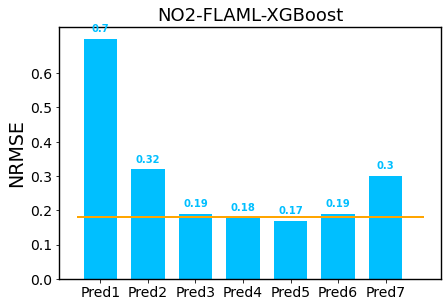

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(5.3,3.5))
ax = fig.add_axes([0,0,1,1])
x= ['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7']
students1=rmse
students2= [48,32,22,18,16]
plt.hlines([rmse_r], -0.5, 6.8, color='orange', linewidth=2)
x = np.arange(7)
wid= 0.7
graph1=ax.bar(x,students1,wid, color='#00BFFF', alpha=1)
#graph2=ax.bar(x+0.2,students2,wid, color='#00BFFF', alpha=1)
#plt.legend(['15min','60min'],title='Data resolution')
i= 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+0.02,
             str(students1[i]),
             ha='center',
             weight='bold',fontsize=10, color='#00BFFF', alpha=1)
    i+=1

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,0.7, step=0.1))

#plt.xlabel('Tolerance,Tc (%)', fontsize=19)
plt.ylabel('NRMSE', fontsize=19)
plt.setp(ax.spines.values(), linewidth=1.4)
plt.title("NO2-FLAML-XGBoost",fontsize=18)
plt.savefig("Pred_NO2_FLAML_XGBoost.pdf", format="pdf", bbox_inches="tight")
plt.show()

X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1440,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
RS=[]
R=[]
for i in range(10):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["rf"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    #print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    #print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)
    RS.append(R2)
    R.append(r)

print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

In [16]:
print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

NameError: name 'R' is not defined

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgboost"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-XGBoost',fontsize=16)
plt.savefig("co_xgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgb_limitdepth"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["extra_tree"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-Extra Tree',fontsize=16)
plt.savefig("co_extra_tree.pdf", format="pdf", bbox_inches="tight")

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)